In [60]:
# Import necessary modules
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Import our input dataset
GeneticDisorder_df = pd.read_csv(
    Path(r"Resources\genetic_disorder.csv")
)
GeneticDisorder_df.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,...,H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder
0,11.0,No,No,Yes,No,5.209058,44.0,Alive,Tachypnea,Tachycardia,...,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,Mitochondrial genetic inheritance disorders
1,4.0,No,Yes,Yes,Yes,4.752272,42.0,Alive,Tachypnea,Tachycardia,...,No,No,No,Yes,Yes,1.0,Multiple,6.397702,abnormal,Multifactorial genetic inheritance disorders
2,6.0,Yes,No,Yes,No,4.620420,20.0,Alive,Tachypnea,Tachycardia,...,Yes,Yes,-,No,No,3.0,Multiple,3.000000,slightly abnormal,Mitochondrial genetic inheritance disorders
3,10.0,Yes,Yes,Yes,No,4.751452,57.0,Deceased,Normal (30-60),Tachycardia,...,No,Yes,No,Yes,Yes,3.0,Singular,9.382407,abnormal,Mitochondrial genetic inheritance disorders
4,6.0,No,Yes,Yes,Yes,4.876896,48.0,Deceased,Tachypnea,Normal,...,Yes,No,No,Yes,No,1.0,Singular,7.370477,normal,Single-gene inheritance diseases


In [62]:
# Drop unnecessary columns
columns_to_remove = ['Patient Id', 'Patient First Name', 'Family Name', 'Father\'s name', 'Mother\'s age', ' Father\'s age', 'Institute Name', 'Status', 'Location of Institute','Test 1','Test 2','Test 3','Test 4','Test 5','Symptom 1','Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5','Parental consent', 'Disorder Subclass']
columns_to_remove_train = [col for col in columns_to_remove if col in GeneticDisorder_df.columns]
GeneticDisorder_cleaned_df = GeneticDisorder_df.drop(columns=columns_to_remove_train)

In [63]:
# Drop rows with missing values
GeneticDisorder_dropped_df = GeneticDisorder_cleaned_df.dropna()

In [64]:
# Split the data into X (features) and y (target)
y = GeneticDisorder_dropped_df['Genetic Disorder']
X = GeneticDisorder_dropped_df.drop(columns=['Genetic Disorder'])

In [65]:
# Identify categorical columns and perform one-hot encoding
categorical_columns = X.select_dtypes(include=['object']).columns
GeneticDisorder_encoded_df = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(GeneticDisorder_encoded_df, y, random_state=1, stratify=y)

In [67]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=1)

In [69]:
# Train the model
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1)

In [70]:
# Evaluate the model
train_score = rf_classifier.score(X_train_scaled, y_train)
test_score = rf_classifier.score(X_test_scaled, y_test)

print(f"Training Data Score: {train_score}")
print(f"Testing Data Score: {test_score}")

Training Data Score: 1.0
Testing Data Score: 0.49568679495686796


In [71]:
# Generate predictions
rf_training_predictions = rf_classifier.predict(X_train_scaled)
rf_testing_predictions = rf_classifier.predict(X_test_scaled)

In [72]:
# Create confusion matrix for training data
rf_training_matrix = confusion_matrix(y_train, rf_training_predictions)
print("Confusion Matrix for Random Forest model (Training):")
print(rf_training_matrix)

Confusion Matrix for Random Forest model (Training):
[[2320    0    0]
 [   0  473    0]
 [   0    0 1727]]


In [73]:
# Create confusion matrix for testing data
rf_testing_matrix = confusion_matrix(y_test, rf_testing_predictions)
print("Confusion Matrix for Random Forest model (Testing):")
print(rf_testing_matrix)

Confusion Matrix for Random Forest model (Testing):
[[650   0 124]
 [131   0  26]
 [479   0  97]]


In [74]:
# Create classification report for training data
rf_training_report = classification_report(y_train, rf_training_predictions)
print("Classification Report for Random Forest model (Training):")
print(rf_training_report)

Classification Report for Random Forest model (Training):
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       1.00      1.00      1.00      2320
Multifactorial genetic inheritance disorders       1.00      1.00      1.00       473
            Single-gene inheritance diseases       1.00      1.00      1.00      1727

                                    accuracy                           1.00      4520
                                   macro avg       1.00      1.00      1.00      4520
                                weighted avg       1.00      1.00      1.00      4520



In [75]:
# Create classification report for testing data
rf_testing_report = classification_report(y_test, rf_testing_predictions)
print("Classification Report for Random Forest model (Testing):")
print(rf_testing_report)

Classification Report for Random Forest model (Testing):
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.52      0.84      0.64       774
Multifactorial genetic inheritance disorders       0.00      0.00      0.00       157
            Single-gene inheritance diseases       0.39      0.17      0.24       576

                                    accuracy                           0.50      1507
                                   macro avg       0.30      0.34      0.29      1507
                                weighted avg       0.42      0.50      0.42      1507



c:\Users\starl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\starl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\starl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
# Print the balanced_accuracy score of the model
print(f"The balanced_accuracy score of the Random Forest model: {balanced_accuracy_score(y_test, rf_testing_predictions)}")


The balanced_accuracy score of the Random Forest model: 0.3360653531438415


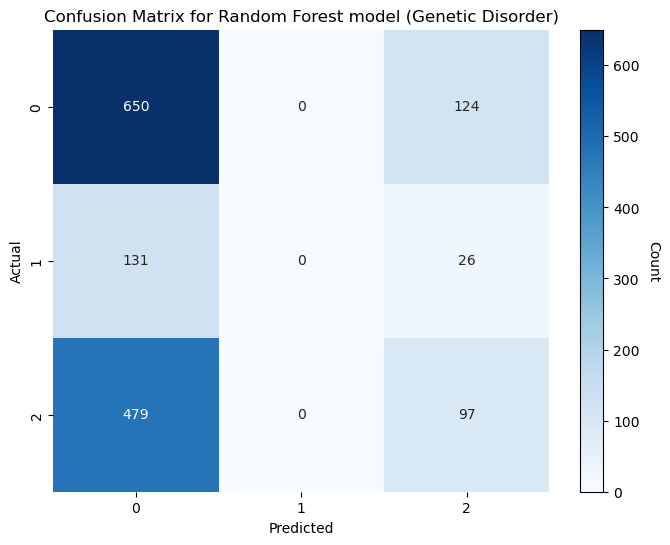

In [77]:
# Confusion Matrix Heatmap for Random Forest model
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(rf_testing_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest model (Genetic Disorder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add legend
cbar = heatmap.figure.colorbar(heatmap.collections[0])
cbar.set_label('Count', rotation=270, labelpad=15)

plt.show()

In [78]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5)

# Fit the model to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_rf_model = grid_search.best_estimator_

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Get the names of all features
all_feature_names = GeneticDisorder_encoded_df.columns

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Display the DataFrame sorted by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


,Feature,Importance
1,Blood cell count (mcL),0.124126
4,White Blood cell count (thousand per microliter),0.115915
2,Father's age,0.105882
0,Patient Age,0.083422
3,No. of previous abortion,0.051957
28,Assisted conception IVF/ART_Yes,0.020101
30,Birth defects_Singular,0.019746
10,Heart Rate (rates/min_Tachycardia,0.019567
21,H/O serious maternal illness_Yes,0.019517
8,Paternal gene_Yes,0.019291
